
## The Sonar Data 

### Detecting a Rock or a Mine

Sonar, also known as sound navigation ranging, is a technique that utilizes sound propagation to navigate, detect, or communicate with objects on or below the water surface, primarily in underwater scenarios like submarine navigation.

The dataset includes response metrics for 60 distinct sonar frequencies transmitted into a pre-existing minefield (including known rocks). Each frequency is associated with a known object, either a rock or a mine, at which the sound was directed.

Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')

In [3]:
df['Label']

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Label, Length: 208, dtype: object

## Data Exploration



<AxesSubplot:>

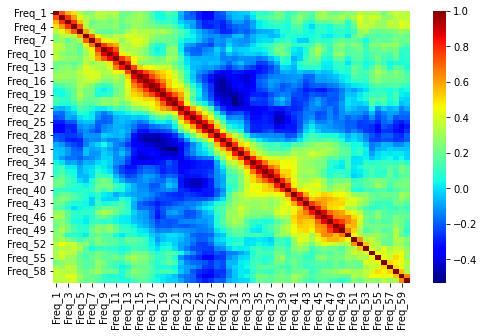

In [4]:
plt.figure(figsize=(8,5))
sns.heatmap(data=df.corr(), cmap='jet')

In [5]:
df['Target'] = df['Label'].map({'R': 0 , 'M':1})
df.corr()['Target'].sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

## Data preparation

In [6]:
from sklearn.model_selection import train_test_split

In [7]:

X = df.drop(['Target', 'Label'], axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler', scaler), ('knn', knn)]
pipe = Pipeline(operations)

In [9]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,30))
param_grid = {'knn__n_neighbors':k_values}
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)
full_cv_classifier.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')>

In [10]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Performance Analysis

In [11]:
data = full_cv_classifier.cv_results_['mean_test_score']

Text(0, 0.5, 'accuracy')

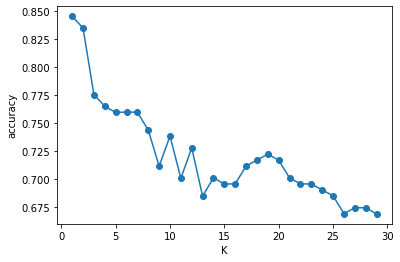

In [12]:
plt.plot(k_values, data,'-o')
plt.xlabel('K')
plt.ylabel('accuracy')

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
y_pred = full_cv_classifier.predict(X_test)

In [15]:
confusion_matrix(y_pred, y_test)

array([[ 7,  1],
       [ 1, 12]], dtype=int64)

In [16]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

